# Import the dataset, cifar10

In [3]:
from tensorflow.keras.datasets import cifar10

# Splitting the dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


# Normalize the image

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0


In [6]:
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


Check GPU availability

In [5]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices("GPU")


2.20.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
# building the model
from tensorflow import keras

img_input = keras.layers.Input(shape=(32,32,3))

x = keras.layers.Conv2D(32,3,activation='relu')(img_input)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(64,3,activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Conv2D(128,3,activation='relu')(x)
x = keras.layers.MaxPooling2D(2)(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(128, activation='relu')(x)

output = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(img_input,output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train_images,
    train_labels,
    batch_size=20,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10


2025-12-06 20:37:30.787272: I external/local_xla/xla/service/service.cc:163] XLA service 0x7efb38017dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-06 20:37:30.787305: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-12-06 20:37:30.823276: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-06 20:37:31.030505: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
I0000 00:00:1765028252.399342   23013 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2000/2000 - 9s - 5ms/step - accuracy: 0.4527 - loss: 1.5060 - val_accuracy: 0.5827 - val_loss: 1.1896
Epoch 2/10
2000/2000 - 6s - 3ms/step - accuracy: 0.6055 - loss: 1.1185 - val_accuracy: 0.6294 - val_loss: 1.0755
Epoch 3/10
2000/2000 - 7s - 3ms/step - accuracy: 0.6647 - loss: 0.9527 - val_accuracy: 0.6652 - val_loss: 0.9659
Epoch 4/10
2000/2000 - 7s - 3ms/step - accuracy: 0.7064 - loss: 0.8384 - val_accuracy: 0.6841 - val_loss: 0.9027
Epoch 5/10
2000/2000 - 5s - 3ms/step - accuracy: 0.7362 - loss: 0.7535 - val_accuracy: 0.6875 - val_loss: 0.9104
Epoch 6/10
2000/2000 - 7s - 3ms/step - accuracy: 0.7584 - loss: 0.6839 - val_accuracy: 0.7048 - val_loss: 0.8657
Epoch 7/10
2000/2000 - 7s - 3ms/step - accuracy: 0.7821 - loss: 0.6200 - val_accuracy: 0.7003 - val_loss: 0.9202
Epoch 8/10
2000/2000 - 7s - 4ms/step - accuracy: 0.8019 - loss: 0.5610 - val_accuracy: 0.7142 - val_loss: 0.8812
Epoch 9/10
2000/2000 - 7s - 4ms/step - accuracy: 0.8238 - loss: 0.5010 - val_accuracy: 0.7179 - val_loss: 0

Final Training Accuracy: 0.8365499973297119
Final Validation Accuracy: 0.7139999866485596
Final Training Loss: 0.4579094648361206
Final Validation Loss: 0.9553707838058472


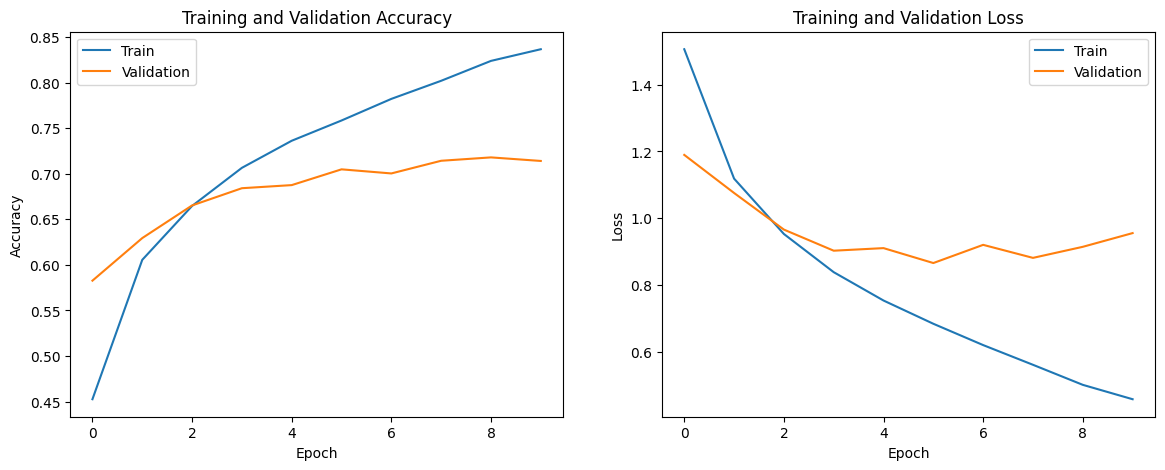

In [13]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print("Final Training Accuracy:", train_acc)
print("Final Validation Accuracy:", val_acc)
print("Final Training Loss:", train_loss)
print("Final Validation Loss:", val_loss)

plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()